In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
#read data from csv
df = pd.read_csv("data.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [6]:
##Exploration
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [9]:
# Checking missing values
df.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,False,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


In [10]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

==> This data doesn't have missing values

In [13]:
# Check duplicated values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

==> Have no duplicated values

In [14]:
#How big the dataset?
len(df.index)


1000

##### Phân loại thuộc tính

In [15]:
# Vì bài toán chỉ focus vào chi phí đầu tư sản xuất và lợi nhuận sau khi đầu tư cho nên chúng ta tiến hành chọn tất cả các giá trị trong 2 cột "R&D Spend" vs "Profit"
df_selected = df[["R&D Spend", "Profit"]]
df_selected

,R&D Spend,Profit
0,165349.20,192261.83000
1,162597.70,191792.06000
2,153441.51,191050.39000
3,144372.41,182901.99000
4,142107.34,166187.94000
...,...,...
995,54135.00,95279.96251
996,134970.00,164336.60550
997,100275.47,413956.48000
998,128456.23,333962.19000


In [17]:
df_selected['R&Dspend Group'] = pd.cut(df_selected['R&D Spend'],bins = [0,20000,40000,60000,80000,100000,120000,150000,170000])
df_selected

C:\Users\DELL\AppData\Local\Temp\ipykernel_10560\3835424602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['R&Dspend Group'] = pd.cut(df_selected['R&D Spend'],bins = [0,20000,40000,60000,80000,100000,120000,150000,170000])


,R&D Spend,Profit,R&Dspend Group
0,165349.20,192261.83000,"(150000, 170000]"
1,162597.70,191792.06000,"(150000, 170000]"
2,153441.51,191050.39000,"(150000, 170000]"
3,144372.41,182901.99000,"(120000, 150000]"
4,142107.34,166187.94000,"(120000, 150000]"
...,...,...,...
995,54135.00,95279.96251,"(40000, 60000]"
996,134970.00,164336.60550,"(120000, 150000]"
997,100275.47,413956.48000,"(100000, 120000]"
998,128456.23,333962.19000,"(120000, 150000]"


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


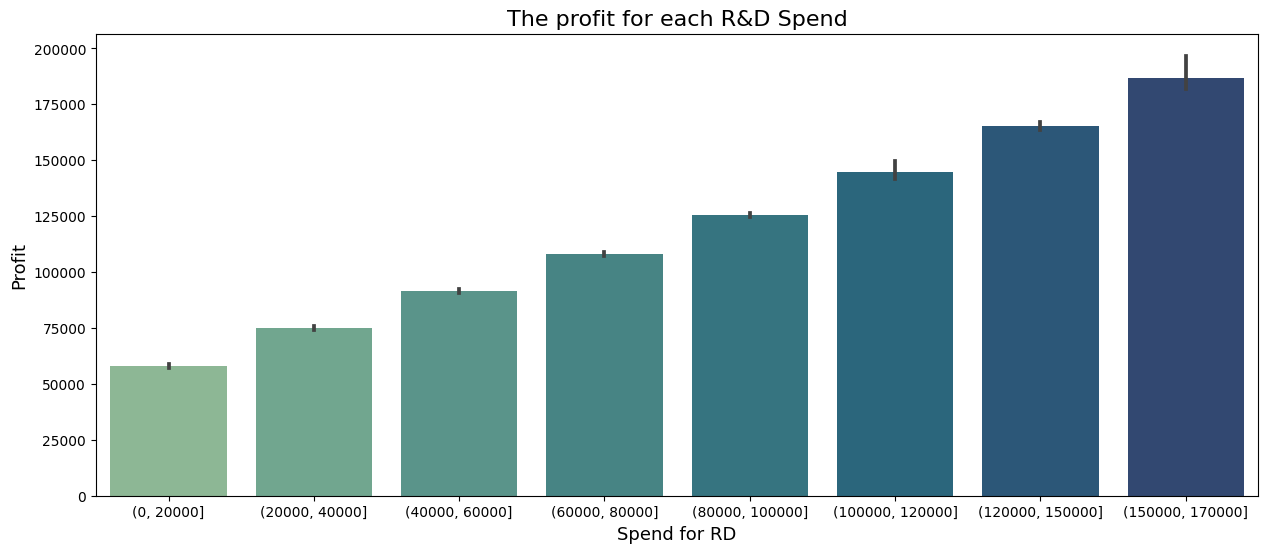

In [18]:
plt.figure(figsize=(15,6))
sns.barplot(data = df_selected, x = 'R&Dspend Group', y = 'Profit', palette='crest')
plt.title("The profit for each R&D Spend", fontsize = 16)
plt.xlabel("Spend for RD", fontsize = 13)
plt.ylabel("Profit", fontsize = 13)
plt.show()